In [1]:
#Import of Useful Libraries

import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import the numpy library
import random as rdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import welly
from scipy import stats
from scipy.interpolate import interp1d
from scipy.interpolate import griddata


## Import las file

This code works to import .las files, which is the most common format for well log files. In this case although the code is shown, a different file was used to develop the exercise, that was later on imported in the 'Process logs' section

In [2]:
project = welly.read_las('https://raw.githubusercontent.com/dnicolasespinoza/GeomechanicsJupyter/master/1_14-1_Composite.las')
well=project[0]
data = well.df()

1it [00:01,  1.32s/it]


In [3]:
data.reset_index(inplace=True,  level=['DEPTH']) #I turn DEPTH into a column
#data.reset_index(inplace=True, drop=True)
data.tail()

,DEPTH,CALI,DRHO,DT,GR,NPHI,PEF,RHOB,RS,RT,RXO,SP
25625,4019.4463999985,9.7786,-0.0030000000,117.1808999903,117.5173999506,32.0138999913,NaN,2.5683000000,2.2891000000,1.6457999982,NaN,39.7866000215
25626,4019.5987999985,9.7786,-0.0006000000,117.1874999999,112.4196000487,30.6962000126,NaN,2.5733000000,2.3664999993,1.6648999998,NaN,39.7361000005
25627,4019.7511999985,9.7786,-0.0007000000,116.5666000059,111.6314000075,30.3350000034,NaN,2.5550000002,2.5123999986,1.7463999992,NaN,37.9700000169
25628,4019.9035999985,9.7786,-0.0059999999,111.2228000510,105.8625000551,29.0127000126,NaN,2.5267000003,2.8176999971,1.7934999996,NaN,36.4367000146
25629,4020.0559999985,9.7786,-0.0097000000,107.4000000365,100.9794000466,28.6232000037,NaN,2.4956000003,3.0642999976,1.8752999992,NaN,36.6405999981


## Import survey

The deviation survey of the well is imported here, it is defined by the inclination and azimuth of each point in the well

In [4]:
surv = pd.read_excel('Survey - Python Final Project.xlsx')
surv.head()

,MD (ft),Inclination (°),Azimuth (°),TVD (ft),Northing (ft),Easting (ft)
0,0.00,0.00,0.00,0.00,0.00,0.00
1,8.39,0.47,71.05,8.39,0.05,0.07
2,24.65,0.46,69.45,24.65,0.09,0.20
3,42.08,0.45,67.65,42.08,0.14,0.32
4,70.37,1.30,66.30,70.37,0.31,0.72


In [5]:
# Fit interpolants to fill gaps for depth in the deviation survey

x = surv['MD (ft)']
y = surv['TVD (ft)']
MD_to_TVD = interp1d(x, y, kind='linear')

y = surv['Inclination (°)']
MD_to_Inc = interp1d(x, y, kind='linear')

y = surv['Azimuth (°)']
MD_to_Azi = interp1d(x, y, kind='linear')

y = surv['Northing (ft)']
MD_to_North = interp1d(x, y, kind='linear')

y = surv['Easting (ft)']
MD_to_East = interp1d(x, y, kind='linear')

MD = np.arange(0,int(max(surv['MD (ft)'])))
Inc = MD_to_Inc(MD)
Azi = MD_to_Azi(MD)
TVD = MD_to_TVD(MD)
North = MD_to_North(MD)
East = MD_to_East(MD)

surv_data = np.stack([MD, Inc, Azi, TVD, North, East], axis=-1)
headers = surv.columns.values

surv = pd.DataFrame(surv_data, columns = headers)


In [6]:
surv.head()

,MD (ft),Inclination (°),Azimuth (°),TVD (ft),Northing (ft),Easting (ft)
0,0.0,0.0000000000,0.0000000000,0.0,0.0000000000,0.0000000000
1,1.0,0.0560190703,8.4684147795,1.0,0.0059594756,0.0083432658
2,2.0,0.1120381406,16.9368295590,2.0,0.0119189511,0.0166865316
3,3.0,0.1680572110,25.4052443385,3.0,0.0178784267,0.0250297974
4,4.0,0.2240762813,33.8736591180,4.0,0.0238379023,0.0333730632


Text(0, 0.5, 'TVD (ft)')

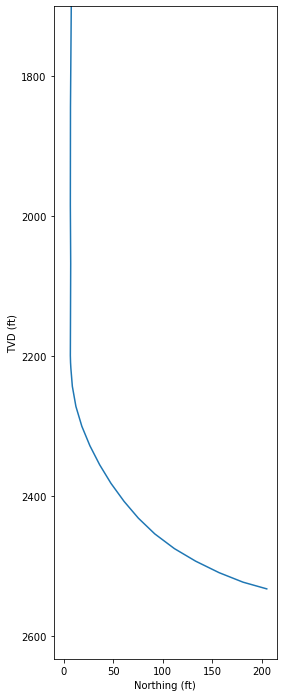

In [7]:
#Plotting the deviation survey of the log in a vertical cross section

fig = plt.figure(figsize = (4,12))
plt.plot(surv['Northing (ft)'], surv['TVD (ft)'])
plt.ylim(max(surv['TVD (ft)'])+100, 1700)
plt.xlabel('Northing (ft)')
plt.ylabel('TVD (ft)')

## Process logs

In [8]:
#The logs used in this exercise are imported here, they come from material provided in another class

with open('C:/Users/aggar/OneDrive - ITBA/Documentos/Fulbright/UT Austin/Courses/Geomechanics/Assignment 3/LostHills.txt') as f:
    n_cols = len(f.readline().split(" "))
    x = f.readline().split(" ")
data = np.loadtxt('C:/Users/aggar/OneDrive - ITBA/Documentos/Fulbright/UT Austin/Courses/Geomechanics/Assignment 3/LostHills.txt', skiprows = 2, usecols=range(0,n_cols-2))
headers = ['DEPTH (ft)', 'Res Press (psi)','Density (g/cm3)','DT Comp (us/ft)','DT Shear (us/ft)','Porosity']

data = pd.DataFrame(data,columns=headers)

In [9]:
data.head()

,DEPTH (ft),Res Press (psi),Density (g/cm3),DT Comp (us/ft),DT Shear (us/ft),Porosity
0,1750.0,700.0,1.87,177.0,477.0,0.37
1,1755.0,702.0,1.86,176.0,479.0,0.38
2,1760.0,704.0,1.85,180.0,481.0,0.39
3,1765.0,706.0,1.86,180.0,482.0,0.38
4,1770.0,708.0,1.87,177.0,473.0,0.37


In [10]:
#I calculate TVD for every point from the DEPTH column based on the deviation survey table

data['TVD (ft)'] = np.round(MD_to_TVD(data['DEPTH (ft)'].values),2)

In [11]:
data.head()

,DEPTH (ft),Res Press (psi),Density (g/cm3),DT Comp (us/ft),DT Shear (us/ft),Porosity,TVD (ft)
0,1750.0,700.0,1.87,177.0,477.0,0.37,1749.38
1,1755.0,702.0,1.86,176.0,479.0,0.38,1754.37
2,1760.0,704.0,1.85,180.0,481.0,0.39,1759.37
3,1765.0,706.0,1.86,180.0,482.0,0.38,1764.37
4,1770.0,708.0,1.87,177.0,473.0,0.37,1769.37


In [12]:
#Sv is defined as the total vertical stress and is calculated from the density log

Sv = np.zeros(len(data))
dens = data['Density (g/cm3)'].values #all the other density points apart from the first one
dh = data['TVD (ft)'].diff().shift(0).values #Length interval between depth points
h = data['TVD (ft)'].values #DEPTH array
h0 = h[0]
d0 = data['Density (g/cm3)'][0] #first density point

Sv[0] = d0*1/2.3*h0
Sv[1:] = dens[1:]*1/2.3*dh[1:]

# this is a nice line of code: Sv[1:] = [(dens[i]*1/2.3*dh[i]+Sv[i]) for i in range(len(dens))]


In [13]:
data.head()

,DEPTH (ft),Res Press (psi),Density (g/cm3),DT Comp (us/ft),DT Shear (us/ft),Porosity,TVD (ft)
0,1750.0,700.0,1.87,177.0,477.0,0.37,1749.38
1,1755.0,702.0,1.86,176.0,479.0,0.38,1754.37
2,1760.0,704.0,1.85,180.0,481.0,0.39,1759.37
3,1765.0,706.0,1.86,180.0,482.0,0.38,1764.37
4,1770.0,708.0,1.87,177.0,473.0,0.37,1769.37


In [14]:
# Dynamic Poisson’s ratio and dynamic Young’s modulus are computed from compressive and shear slowness 
# Assuming Total Isotropy

#Convert slowness into velocity and modify units into m/seg
Ds = data['DT Shear (us/ft)'].values
Vs = 1/Ds*0.3048*1e6

Dp = data['DT Comp (us/ft)'].values
Vp = 1/Dp*0.3048*1e6


E_d = np.round(dens*(1000) * Vs**2 *(3*Vp**2 - 4*Vs**2)/(Vp**2-Vs**2)/(1e6)*145.038,0) #psi
P_d = np.round((Vp**2 - 2*Vs**2)/(2*(Vp**2-Vs**2)),3)

#I calculate Static Young Modulus and Poisson' ratio (this conversion ratio is assumed from empirical experience)
E_s = 0.65*E_d
P_s = P_d

data['Young (psi)'] = E_s
data['Poisson'] = P_s

In [15]:
data.head()

,DEPTH (ft),Res Press (psi),Density (g/cm3),DT Comp (us/ft),DT Shear (us/ft),Porosity,TVD (ft),Young (psi),Poisson
0,1750.0,700.0,1.87,177.0,477.0,0.37,1749.38,204454.90,0.420
1,1755.0,702.0,1.86,176.0,479.0,0.38,1754.37,201922.50,0.422
2,1760.0,704.0,1.85,180.0,481.0,0.39,1759.37,198695.90,0.419
3,1765.0,706.0,1.86,180.0,482.0,0.38,1764.37,198997.50,0.419
4,1770.0,708.0,1.87,177.0,473.0,0.37,1769.37,207696.45,0.419


In [16]:
#I define an array for Pore pressure and assume a reasonable value for the Biot coefficient

PP = data['Res Press (psi)'].values
Biot = 0.9

In [17]:
#Maximum and minimum horizontal stress are calculated assuming elasticity 

TectStrain_h = 0
TectStrain_H = 0.0015

Sh = P_s/(1-P_s)*(Sv - Biot*PP) + E_s/(1-P_s**2) *(TectStrain_h + P_s*TectStrain_H) + Biot*PP
SH = P_s/(1-P_s)*(Sv-Biot*PP) + E_s/(1-P_s**2) *(TectStrain_H + P_s*TectStrain_h) + Biot*PP

data['Sv (psi)'] = Sv
data['Sv (psi)'] = data['Sv (psi)'].cumsum()

data['Sh (psi)'] = Sh
data['SH (psi)'] = SH


In [18]:
data.head()

,DEPTH (ft),Res Press (psi),Density (g/cm3),DT Comp (us/ft),DT Shear (us/ft),Porosity,TVD (ft),Young (psi),Poisson,Sv (psi),Sh (psi),SH (psi)
0,1750.0,700.0,1.87,177.0,477.0,0.37,1749.38,204454.90,0.420,1422.3220000000,1360.1450070423,1576.1184929577
1,1755.0,702.0,1.86,176.0,479.0,0.38,1754.37,201922.50,0.422,1426.3573913043,328.9776252749,541.9760429965
2,1760.0,704.0,1.85,180.0,481.0,0.39,1759.37,198695.90,0.419,1430.3791304348,331.0399473935,541.0778966535
3,1765.0,706.0,1.86,180.0,482.0,0.38,1764.37,198997.50,0.419,1434.4226086957,331.7874390079,542.1442043356
4,1770.0,708.0,1.87,177.0,473.0,0.37,1769.37,207696.45,0.419,1438.4878260870,338.9365376242,558.4888103515


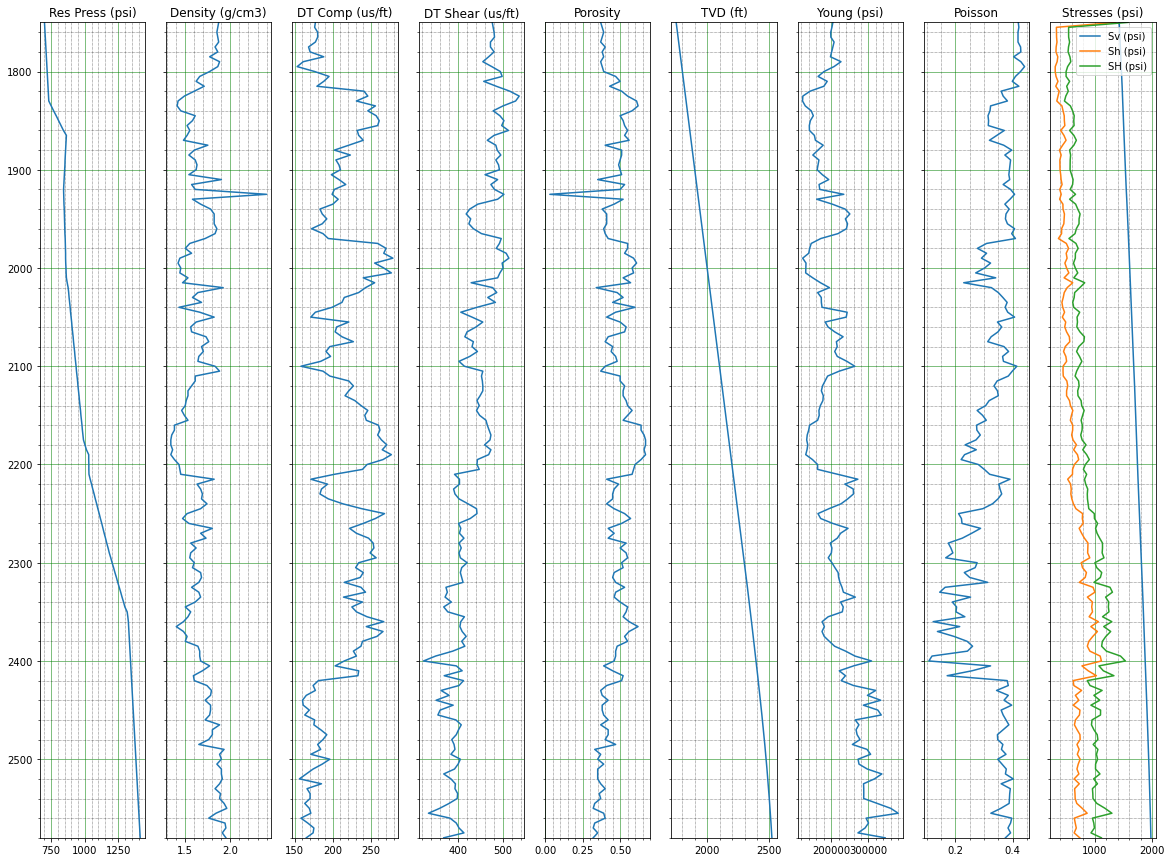

In [19]:
# I plot all the logs together with the calculated rock properties and stresses

logs = data.columns.values
cols = data.shape[1]


fig,ax = plt.subplots(ncols=cols-3, figsize= (20,15), sharey=True)

for i in range(1, cols-3):
    ax[i-1].plot(data.iloc[:,i].values,data.iloc[:,0].values)
    ax[i-1].set_ylim(max(data.iloc[:,0]),min(data.iloc[:,0]))
    ax[i-1].minorticks_on()
    ax[i-1].grid(which='major',linestyle='-',linewidth='0.5',color='green')
    ax[i-1].grid(which='minor',linestyle=':',linewidth='0.5',color='black')
    ax[i-1].set_title('%s' %logs[i])

#    ax[i-1].plot([max(data.iloc[:,i]),min(data.iloc[:,i])],[Depth, Depth], color = 'red')

ax[cols-4].plot(data.iloc[:,cols-3].values,data.iloc[:,0].values, label = ('%s' %logs[cols-3]) )
ax[cols-4].plot(data.iloc[:,cols-2].values,data.iloc[:,0].values, label = ('%s' %logs[cols-2]))
ax[cols-4].plot(data.iloc[:,cols-1].values,data.iloc[:,0].values, label = ('%s' %logs[cols-1]))

ax[cols-4].set_ylim(max(data.iloc[:,0]),min(data.iloc[:,0]))
ax[cols-4].minorticks_on()
ax[cols-4].grid(which='major',linestyle='-',linewidth='0.5',color='green')
ax[cols-4].grid(which='minor',linestyle=':',linewidth='0.5',color='black')
ax[cols-4].set_title('Stresses (psi)')
ax[cols-4].legend(loc = True)
#ax[cols-4].plot([max(data.iloc[:,cols-3]),0],[Depth, Depth], color = 'red')


Now that all the stresses have been calculated from the logs, all I need is to define 2 depths two show the differences between a zone without deviation and a zone that is deviated in the wellbore. After that, I can call the functions I defined previously in the 'Geomechanics Functions' jupyter notebook to plot the stress state for each depth in the wellbore.

In [20]:
# I define 2 depths

Depth1 = 2100 #ft MD
Depth2 = 2550 #ft MD

(0.0, 1974.3510869565216)

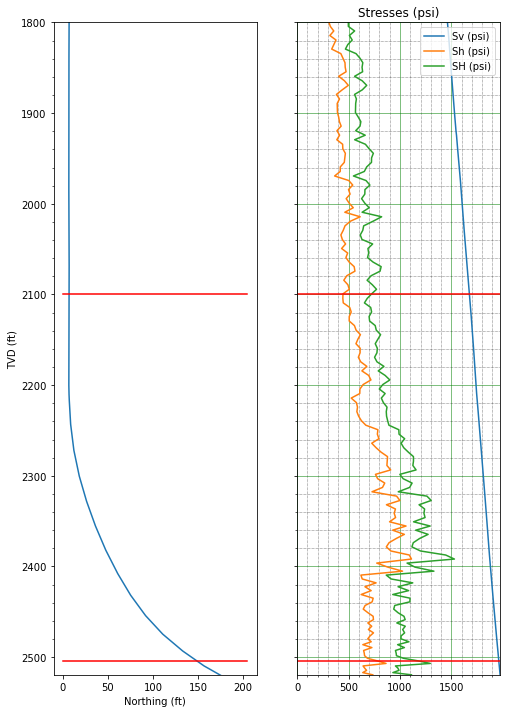

In [21]:
#I plot lines for both depths, showing the well trajectory together with the associated stresses at each depth

logs = data.columns.values
cols = data.shape[1]


fig,ax = plt.subplots(ncols = 2, figsize= (8,12), sharey=True)

ax[0].plot(surv['Northing (ft)'], surv['TVD (ft)'])
ax[0].set_ylim(max(surv['TVD (ft)'])+100, 1700)
ax[0].set_xlabel('Northing (ft)')
ax[0].set_ylabel('TVD (ft)')
ax[0].plot([max(surv.loc[:,'Northing (ft)']),0],[surv['TVD (ft)'][Depth1], surv['TVD (ft)'][Depth1]], color = 'red')
ax[0].plot([max(surv.loc[:,'Northing (ft)']),0],[surv['TVD (ft)'][Depth2], surv['TVD (ft)'][Depth2]], color = 'red')


ax[1].plot(data.iloc[:,cols-3].values,data.loc[:,'TVD (ft)'].values, label = ('%s' %logs[cols-3]) )
ax[1].plot(data.iloc[:,cols-2].values,data.loc[:,'TVD (ft)'].values, label = ('%s' %logs[cols-2]))
ax[1].plot(data.iloc[:,cols-1].values,data.loc[:,'TVD (ft)'].values, label = ('%s' %logs[cols-1]))

ax[1].set_ylim(max(data.loc[:,'TVD (ft)']),min(data.iloc[:,0])+50)
ax[1].minorticks_on()
ax[1].grid(which='major',linestyle='-',linewidth='0.5',color='green')
ax[1].grid(which='minor',linestyle=':',linewidth='0.5',color='black')
ax[1].set_title('Stresses (psi)')
ax[1].legend(loc = True)
ax[1].plot([max(data.iloc[:,cols-3]),0],[surv['TVD (ft)'][Depth1], surv['TVD (ft)'][Depth1]], color = 'red')
ax[1].plot([max(data.iloc[:,cols-3]),0],[surv['TVD (ft)'][Depth2], surv['TVD (ft)'][Depth2]], color = 'red')
ax[1].set_xlim(0, max(data.loc[:,'Sv (psi)'].values))


In [22]:
#I call the functions from the other jupyter notebook I defined
# Do a definitions-only import

import ipynb.fs  # Boilerplate required

from .defs.Geomechanics_functions import Mohr
from .defs.Geomechanics_functions import Geo_rot
from .defs.Geomechanics_functions import Well_rot
from .defs.Geomechanics_functions import kirsch
from .defs.Geomechanics_functions import Tensile

In [23]:
#I plot the circles that represent all values for UCS and Ts for all possible states of deviation of the well

#Normal Regime is selected based on the stress regime observed in the logs
#THe following angles define the directions of each stress vector with respect to geographical coordinates

Alpha =160
Beta = 90
Gamma = 0

#Stresses at Depth1

Sh1 = round(float(data[data['DEPTH (ft)']==Depth1]['Sh (psi)'].values),2) #MPa
SH1 = round(float(data[data['DEPTH (ft)']==Depth1]['SH (psi)'].values),2) #MPa
Sv1 = round(float(data[data['DEPTH (ft)']==Depth1]['Sv (psi)'].values),2) #MPa

Stresses = [Sh1, SH1, Sv1]
S1_1 = max(Stresses)
S3_1 = min(Stresses)
S2_1 = Stresses[Stresses not in [S1_1, S3_1]]

#Stresses at Depth2

Sh2 = round(float(data[data['DEPTH (ft)']==Depth2]['Sh (psi)'].values),2) #MPa
SH2 = round(float(data[data['DEPTH (ft)']==Depth2]['SH (psi)'].values),2) #MPa
Sv2 = round(float(data[data['DEPTH (ft)']==Depth2]['Sv (psi)'].values),2) #MPa

Stresses = [Sh2, SH2, Sv2]
S1_2 = max(Stresses)
S3_2 = min(Stresses)
S2_2 = Stresses[Stresses not in [S1_2, S3_2]]

#Other important definitions

PP_1 = round(float(data[data['DEPTH (ft)']==Depth1]['Res Press (psi)'].values),2) #psi #Pore pressure at Depth 1
PW_1 = PP_1 #psi mud pressure at Depth 1 equal to PP

PP_2 = round(float(data[data['DEPTH (ft)']==Depth2]['Res Press (psi)'].values),2) #psi #Pore pressure at Depth 2
PW_2 = PP_2 #psi mud pressure at Depth 2 equal to PP

Poisson = 0.3   #Poisson ratio
inc_1 = surv['Inclination (°)'][Depth1]  #well inclination at depth 1
azi_1 = surv['Azimuth (°)'][Depth1]      #well azimuth at depth 1

inc_2 = surv['Inclination (°)'][Depth2]  #well inclination at depth 1
azi_2 = surv['Azimuth (°)'][Depth2]      #well azimuth at depth 2

s_tensor1 = np.array([[S1_1, 0 , 0], [0, S2_1, 0], [0, 0, S3_1]] )
s_tensor2 = np.array([[S1_2, 0 , 0], [0, S2_2, 0], [0, 0, S3_2]] )


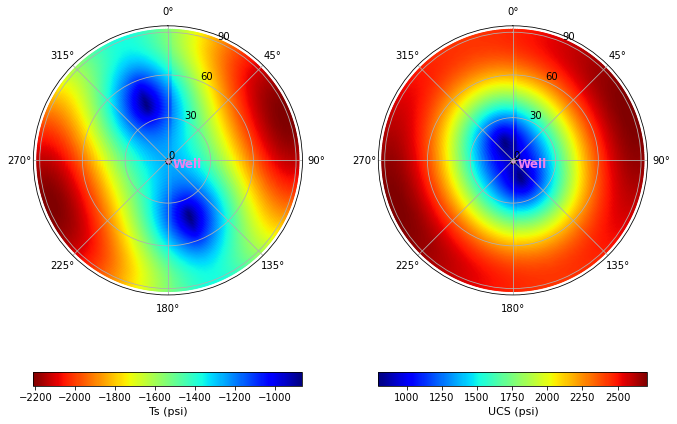

In [24]:
#I mark with a purple dot in the circle the well's deviation state at Depth 1

Tensile(Alpha, Beta, Gamma, S1_1, S2_1, S3_1, PW_1, PP_1, Poisson, inc_1, azi_1)   



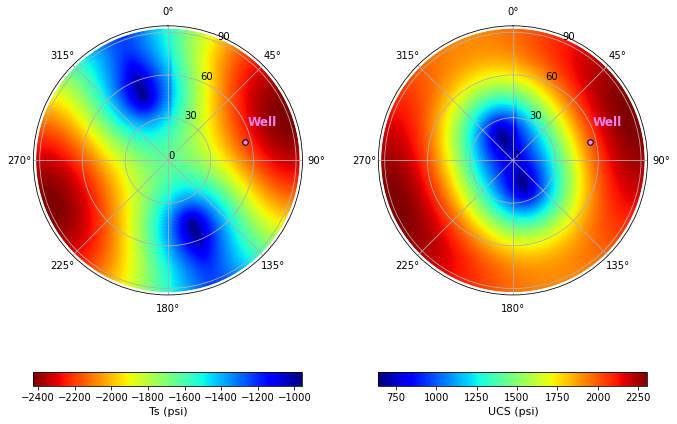

In [25]:
#I mark with a purple dot in the circle the well's deviation state at Depth 2

Tensile(Alpha, Beta, Gamma, S1_2, S2_2, S3_2, PW_2, PP_2, Poisson, inc_2, azi_2)   
